## Helium Pectra Calibration of double monochrometer Ramnor 

In [33]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

read data collected tron NI labview

In [2]:
df = pd.read_csv('iodine run 2.txt',header = None,delimiter='\t')

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,88951,0.113835,0.115846,0.115846,0.120872,0.115176,0.117521,0.115846,0.115846,0.116516,0.117856
1,88952,0.120202,0.114171,0.116851,0.112495,0.118191,0.116181,0.120202,0.116516,0.112160,0.116851
2,88953,0.114841,0.115846,0.119867,0.110820,0.119531,0.115511,0.120537,0.116181,0.118191,0.116851
3,88954,0.116181,0.105793,0.117186,0.111825,0.117186,0.116181,0.119867,0.115846,0.115846,0.113835
4,88955,0.115176,0.116516,0.115846,0.118526,0.117186,0.114841,0.115511,0.115846,0.117856,0.117856
...,...,...,...,...,...,...,...,...,...,...,...
10046,98997,0.116516,0.105458,0.116516,0.120202,0.114171,0.118191,0.115176,0.116181,0.118861,0.116516
10047,98998,0.116851,0.116851,0.118526,0.114506,0.119196,0.114506,0.101771,0.116516,0.115846,0.111490
10048,98999,0.116181,0.116181,0.114506,0.116181,0.115176,0.115846,0.116516,0.112830,0.116516,0.097414
10049,99000,0.116516,0.116516,0.116516,0.117186,0.115846,0.116851,0.116181,0.119867,0.115176,0.117856


In [4]:
# relabel data columns
for i in range(0,12):
    if i == 0:
        df.rename(columns = {i:'Wavenumber'}, inplace = True)
    else:
        df.rename(columns = {i:'Sample'+str(i)}, inplace = True)

In [5]:
df

,Wavenumber,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10
0,88951,0.113835,0.115846,0.115846,0.120872,0.115176,0.117521,0.115846,0.115846,0.116516,0.117856
1,88952,0.120202,0.114171,0.116851,0.112495,0.118191,0.116181,0.120202,0.116516,0.112160,0.116851
2,88953,0.114841,0.115846,0.119867,0.110820,0.119531,0.115511,0.120537,0.116181,0.118191,0.116851
3,88954,0.116181,0.105793,0.117186,0.111825,0.117186,0.116181,0.119867,0.115846,0.115846,0.113835
4,88955,0.115176,0.116516,0.115846,0.118526,0.117186,0.114841,0.115511,0.115846,0.117856,0.117856
...,...,...,...,...,...,...,...,...,...,...,...
10046,98997,0.116516,0.105458,0.116516,0.120202,0.114171,0.118191,0.115176,0.116181,0.118861,0.116516
10047,98998,0.116851,0.116851,0.118526,0.114506,0.119196,0.114506,0.101771,0.116516,0.115846,0.111490
10048,98999,0.116181,0.116181,0.114506,0.116181,0.115176,0.115846,0.116516,0.112830,0.116516,0.097414
10049,99000,0.116516,0.116516,0.116516,0.117186,0.115846,0.116851,0.116181,0.119867,0.115176,0.117856


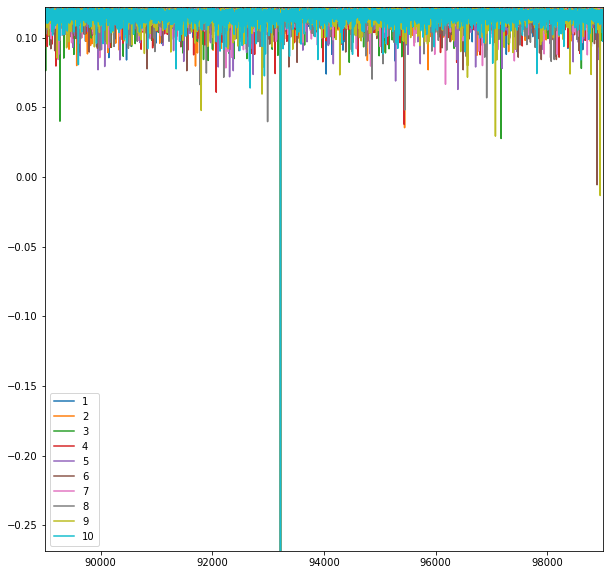

In [17]:
# plot wavenumber by voltage
plt.figure(figsize=(10,10))
for j in range(1,11):
    y = "Sample"+str(j)
    plt.plot(df.Wavenumber,df[y],label=j)
    plt.ylim(df.Sample1.min(),df.Sample1.max()) # largest magnitude, lowest magnitude
plt.xlim(89000,99000)
plt.legend()

In [7]:
df.Sample1.min(),df.Sample1.max()

(-0.268261, 0.121877)

In [11]:
# get wavenumber for spesific voltage
def get_wn(dataframe, val):
    array = dataframe.query(f'Sample1 == {val}')
    return array

In [18]:
# getting the largest magnitude value wavenumber
lm_val= df.Sample1.min()
get_wn(df, lm_val)

,Wavenumber,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10
4270,93221,-0.268261,-0.214701,-0.245351,-0.295224,-0.209314,-0.284438,-0.28646,-0.269609,-0.310733,-0.271968


In [20]:
# getting the smallest magnitude value wavenumber
sm_val= df.Sample1.max()
get_wn(df, sm_val)

,Wavenumber,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10
5370,94321,0.121877,0.117186,0.116181,0.118861,0.116516,0.114171,0.116516,0.110485,0.116516,0.117186


minus noise

In [37]:
find_peaks(df.Sample1)[0]

array([    1,     3,     5, ..., 10040, 10043, 10047])

In [49]:
x = -(df.Sample1-df.Sample1.mean())

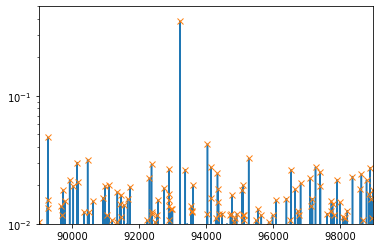

In [64]:
peaks, f = find_peaks(x, height=0.01)
plt.plot(df.Wavenumber, x)
plt.plot(peaks+df.Wavenumber.min(), x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.yscale('log')
plt.xlim(89000,99000)
plt.ylim(0.01,.5)
plt.show()

In [ ]:
for p in peaks:
    if x[p] >1:
        print(p+88971,x[p])